In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [66]:
df=pd.read_csv('C:/Users/Mostafijur Rahman/Desktop/My Project/Data Science Project/IRIS FLOWER CLASSIFICATION/Dataset/Iris.csv')


In [44]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [45]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [46]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [67]:
train=df.copy()
train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [68]:
train=train.drop(['Id'],axis=1)
b=(train.columns)
train.shape

(150, 5)

In [69]:
b

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [70]:
train['Species']=pd.factorize(train['Species'])[0]
train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


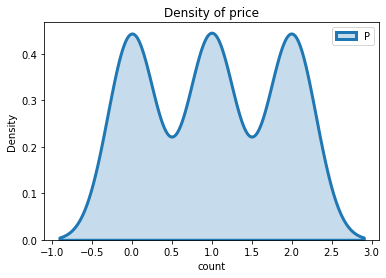

In [71]:
sns.distplot(train['Species'], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
plt.xlabel("count")
plt.ylabel("Density")
plt.title("Density of price")
plt.legend("Price")
plt.show()

In [72]:
from sklearn.preprocessing import LabelEncoder
df = df.drop("Id", axis=1)
df.columns
df["Species"].value_counts()
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [73]:
species_colors = {0: 'yellow', 1: 'red', 2: 'green'}

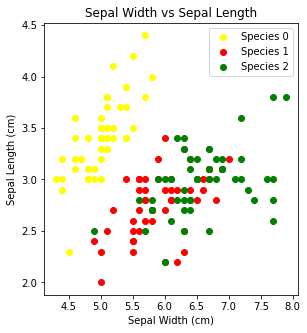

In [74]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for species, color in species_colors.items():
    subset = df[df['Species'] == species]
    plt.scatter(subset['SepalLengthCm'], subset['SepalWidthCm'], label=f'Species {species}', color=color)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Width vs Sepal Length')
plt.legend()

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
dt = LogisticRegression()
dt.fit(X_train,y_train)


LogisticRegression()

In [77]:

from sklearn import metrics
y_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression :", accuracy)


Accuracy of the Logistic Regression : 100.0


In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
from sklearn import metrics

In [80]:
k = 6

In [81]:
knclr = KNeighborsClassifier(n_neighbors=k)

In [82]:
# Fit the classifier to the training data
knclr.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [83]:
y_pred = knclr.predict(X_test)

In [84]:
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
print("Accuracy of the K-Nearest Neighbors classifier:", accuracy)

Accuracy of the K-Nearest Neighbors classifier: 100.0
